In [1]:
import os,csv,json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import seaborn as sns

In [2]:
# import csv
csv_file_name = "/Users/emilydennis/Desktop/humanvselastix.csv"

In [3]:
fulldf = pd.read_csv(csv_file_name)
fulldf.keys()

Index(['volume', 'point', 'annotator', 'z', 'x', 'y', 'brainid'], dtype='object')

In [4]:
fulldf_nocomp = fulldf[fulldf.annotator != 'computer']
fulldf_comp = fulldf[fulldf.annotator == 'computer']

In [5]:
alldata = { } 

for name in np.unique(fulldf_nocomp.annotator):
    alldata[name] = {}
    annotator = fulldf[fulldf.annotator==name]
    for volume in ["A","B","C","D","E","F","G","H"]:
        annotatorvol = annotator[annotator.volume==volume]
        alldata[name][volume]= {}
        for point in range(1,5):
            annotatorpt = annotatorvol[annotatorvol.point==point]
            alldata[name][volume][point] = [annotatorpt.x.tolist(),annotatorpt.y.tolist(),annotatorpt.z.tolist()]



In [6]:
# now that our data is easier to index, want to make different values for plotting
toplot = { } 

for name in np.unique(fulldf_nocomp.annotator):
    toplot[name] = {}
    #want C vs G
    toplot[name]['humanvar'] = {}
    for point in range(1,5):
        vals=(abs(np.subtract(alldata[name]['C'][point],alldata[name]['G'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['humanvar'][point] = val.item()
    toplot[name]['before'] = {}
    for point in range(1,5):
        vals=(abs(np.subtract(alldata[name]['B'][point],alldata[name]['F'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['before'][point] = val.item()
    toplot[name]['affine'] = {}
    for point in range(1,5):
        vals=(abs(np.subtract(alldata[name]['D'][point],alldata[name]['F'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['affine'][point] = val.item()
    toplot[name]['a1b'] = {}
    for point in range(1,5):
        vals=(abs(np.subtract(alldata[name]['E'][point],alldata[name]['F'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['a1b'][point] = val.item()
    toplot[name]['final320'] = {}
    for point in range(1,5):
        vals=(abs(np.subtract(alldata[name]['C'][point],alldata[name]['F'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['final320'][point] = val.item()
    toplot[name]['final315'] = {}
    for point in range(1,5):
        vals=(abs(np.subtract(alldata[name]['A'][point],alldata[name]['F'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['final315'][point] = val.item()
    toplot[name]['final315v320'] = {}
    for point in range(1,5):
        vals=(abs(np.subtract(alldata[name]['A'][point],alldata[name]['C'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['final315v320'][point] = val.item()        

In [7]:
# calculate for each annotator, each point
forplots = ['humanvar','before','affine','a1b','final320','final315','final315v320']
anns = np.unique(fulldf_nocomp.annotator)
points = [1,2,3,4]
# want for each comparison, a value for each annotator and each point
# columns = comparison, annotator, point
# data = [{'comparison':'humanvar','annotator':'name','point':1,'value':}]


In [10]:
collapsedpts=[]
for comparison in forplots:
    for name in anns:
        collapsedpts.append([comparison,name,np.mean([*toplot[name][comparison].values()])])
            
pts=[]
for comparison in forplots:
    for name in anns:
        for point in points:
            pts.append([comparison,name,point,toplot[name][comparison][point]])

In [240]:
pts_df = pd.DataFrame(collapsedpts,columns=['comparison','name','pts','value'])
collapsed_pts_df = pd.DataFrame(pts,columns=['comparison','name','value'])

In [232]:
pts_no_before = collapsed_pts_df[collapsed_pts_df.comparison!='before']
pts_k320_one = pts_no_before[pts_no_before.comparison!='final315']
pts_k320 = pts_k320_one[pts_k320_one.comparison!='final315v320']
pts_k320

,comparison,name,pts,value
0,humanvar,Adrian,1,2.0
1,humanvar,Adrian,2,2.0
2,humanvar,Adrian,3,2.0
3,humanvar,Adrian,4,3.0
4,humanvar,Chuck,1,1.0
...,...,...,...,...
75,final320,Emily,4,5.0
76,final320,Peter,1,4.0
77,final320,Peter,2,13.0
78,final320,Peter,3,1.0


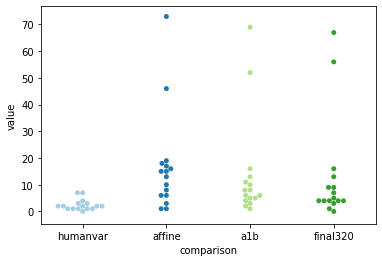

In [245]:
ax=sns.set_palette("Paired")
ax= sns.swarmplot(x='comparison',y='value',data=pts_k320)

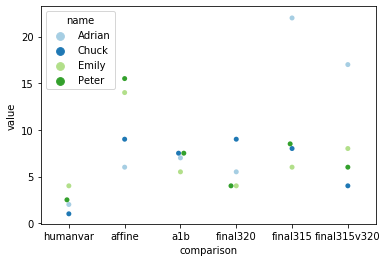

In [250]:
ax=sns.set_palette("Paired")
ax= sns.swarmplot(x='comparison',y='value',data=collapsed_pts_df[collapsed_pts_df.comparison!='before'],hue='name')

[(0.396078431372549, 0.7294117647058823, 0.8549019607843137),
 (0.5294117647058824, 0.8156862745098039, 0.8862745098039215),
 (0.023529411764705882, 0.5568627450980392, 0.5490196078431373),
 (0.4588235294117647, 0.7019607843137254, 0.6549019607843137),
 (0.0, 0.6549019607843137, 0.3411764705882353),
 (0.5098039215686274, 0.7294117647058823, 0.30980392156862746),
 (0.8980392156862745, 0.7294117647058823, 0.3215686274509804),
 (0.9529411764705882, 0.9176470588235294, 0.12156862745098039),
 (0.8470588235294118, 0.43529411764705883, 0.15294117647058825),
 (0.9098039215686274, 0.6196078431372549, 0.13725490196078433),
 (0.7843137254901961, 0.1803921568627451, 0.4196078431372549),
 (0.8313725490196079, 0.4, 0.5607843137254902),
 (0.6, 0.10588235294117647, 0.21568627450980393),
 (0.7647058823529411, 0.0, 0.12941176470588237),
 (0.21176470588235294, 0.25882352941176473, 0.5215686274509804),
 (0.36470588235294116, 0.3215686274509804, 0.5882352941176471),
 (0.49019607843137253, 0.329411764705882

In [43]:
numofanns = np.ones(np.size(np.unique(fulldf.annotator))-1)

In [50]:
colorpalette = ['#65BADA','#87D0E2','#068E8C','#75B3A7','#00A757','#82BA4F','#E5BA52','#F3EA1F','#D86F27','#E89E23','#C82E6B','#D4668F','#991B37','#C30021','#364285','#5D5296','#7D5495']
colorsforplot=[colorpalette[0],colorpalette[2],colorpalette[4],colorpalette[6]]


['#65BADA', '#068E8C', '#00A757', '#E5BA52']

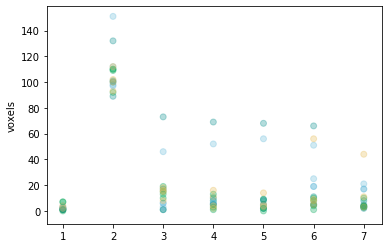

In [51]:
plt.scatter([numofanns],toplot['humanvar'][1],c=colorsforplot,alpha=0.3)
plt.scatter([numofanns],toplot['humanvar'][2],c=colorsforplot,alpha=0.3)
plt.scatter([numofanns],toplot['humanvar'][3],c=colorsforplot,alpha=0.3)
plt.scatter([numofanns],toplot['humanvar'][4],c=colorsforplot,alpha=0.3)


plt.scatter([numofanns*2],toplot['before'][1],c=colorsforplot,alpha=0.3)
plt.scatter([numofanns*2],toplot['before'][2],c=colorsforplot,alpha=0.3)
plt.scatter([numofanns*2],toplot['before'][3],c=colorsforplot,alpha=0.3)
plt.scatter([numofanns*2],toplot['before'][4],c=colorsforplot,alpha=0.3)

plt.scatter([numofanns*3],toplot['affine'][1],c=colorsforplot,alpha=0.3)
plt.scatter([numofanns*3],toplot['affine'][2],c=colorsforplot,alpha=0.3)
plt.scatter([numofanns*3],toplot['affine'][3],c=colorsforplot,alpha=0.3)
plt.scatter([numofanns*3],toplot['affine'][4],c=colorsforplot,alpha=0.3)

plt.scatter([numofanns*4],toplot['a1b'][1],c=colorsforplot,alpha=0.3)
plt.scatter([numofanns*4],toplot['a1b'][2],c=colorsforplot,alpha=0.3)
plt.scatter([numofanns*4],toplot['a1b'][3],c=colorsforplot,alpha=0.3)
plt.scatter([numofanns*4],toplot['a1b'][4],c=colorsforplot,alpha=0.3)

plt.scatter([numofanns*5],toplot['final320g'][1],c=colorsforplot,alpha=0.3)
plt.scatter([numofanns*5],toplot['final320g'][2],c=colorsforplot,alpha=0.3)
plt.scatter([numofanns*5],toplot['final320g'][3],c=colorsforplot,alpha=0.3)
plt.scatter([numofanns*5],toplot['final320g'][4],c=colorsforplot,alpha=0.3)

plt.scatter([numofanns*6],toplot['final315'][1],c=colorsforplot,alpha=0.3)
plt.scatter([numofanns*6],toplot['final315'][2],c=colorsforplot,alpha=0.3)
plt.scatter([numofanns*6],toplot['final315'][3],c=colorsforplot,alpha=0.3)
plt.scatter([numofanns*6],toplot['final315'][4],c=colorsforplot,alpha=0.3)

plt.scatter([numofanns*7],toplot['k315k320'][1],c=colorsforplot,alpha=0.3)
plt.scatter([numofanns*7],toplot['k315k320'][2],c=colorsforplot,alpha=0.3)
plt.scatter([numofanns*7],toplot['k315k320'][3],c=colorsforplot,alpha=0.3)
plt.scatter([numofanns*7],toplot['k315k320'][4],c=colorsforplot,alpha=0.3)
plt.ylabel('voxels')
plt.show()


In [54]:
pd.DataFrame(toplot)

,humanvar,before,affine,a1b,final320,final320g,final315,k315k320
1,"[2.0, 1.0, 0.0, 1.0]","[151.0, 89.0, 92.0, 93.0]","[46.0, 17.0, 19.0, 18.0]","[52.0, 10.0, 8.0, 11.0]","[56.0, 4.0, 0.0, 4.0]","[56.0, 5.0, 0.0, 5.0]","[51.0, 11.0, 10.0, 9.0]","[5.0, 8.0, 10.0, 4.0]"
2,"[2.0, 2.0, 7.0, 3.0]","[98.0, 101.0, 109.0, 102.0]","[6.0, 1.0, 15.0, 16.0]","[6.0, 5.0, 13.0, 16.0]","[4.0, 9.0, 16.0, 13.0]","[2.0, 9.0, 9.0, 14.0]","[19.0, 5.0, 8.0, 56.0]","[17.0, 4.0, 3.0, 44.0]"
3,"[2.0, 1.0, 1.0, 4.0]","[97.0, 100.0, 110.0, 100.0]","[6.0, 1.0, 10.0, 8.0]","[6.0, 5.0, 3.0, 2.0]","[4.0, 9.0, 3.0, 1.0]","[2.0, 8.0, 2.0, 3.0]","[19.0, 5.0, 4.0, 8.0]","[17.0, 3.0, 4.0, 11.0]"
4,"[3.0, 1.0, 7.0, 2.0]","[112.0, 132.0, 110.0, 112.0]","[3.0, 73.0, 13.0, 15.0]","[8.0, 69.0, 1.0, 4.0]","[7.0, 67.0, 5.0, 4.0]","[4.0, 68.0, 2.0, 4.0]","[25.0, 66.0, 1.0, 5.0]","[21.0, 2.0, 3.0, 3.0]"


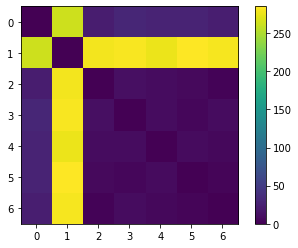

In [8]:
plt.imshow(pt4mat)
plt.colorbar()

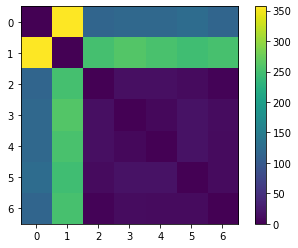

In [50]:
plt.imshow(pt3mat)
plt.colorbar()

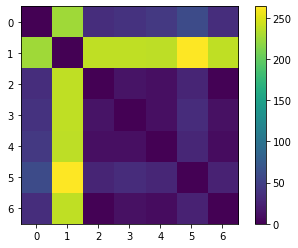

In [51]:
plt.imshow(pt2mat)
plt.colorbar()

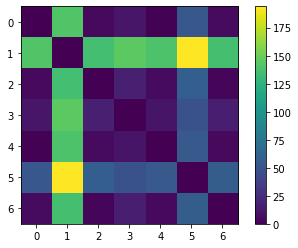

In [52]:
plt.imshow(pt1mat)
plt.colorbar()

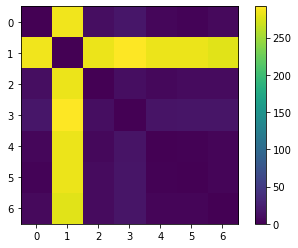

In [57]:
plt.imshow(pt4mat)
plt.colorbar()

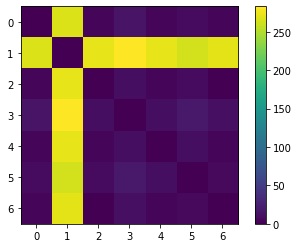

In [58]:
plt.imshow(pt3mat)
plt.colorbar()

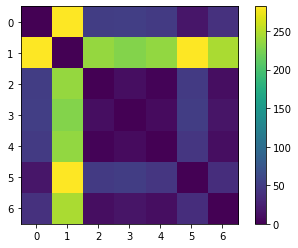

In [59]:
plt.imshow(pt2mat)
plt.colorbar()

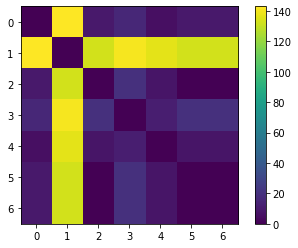

In [60]:
plt.imshow(pt1mat)
plt.colorbar()


In [63]:
pt1mat


array([[  0., 143.,  10.,  16.,   6.,  10.,  10.],
       [143.,   0., 133., 141., 137., 133., 133.],
       [ 10., 133.,   0.,  20.,   8.,   0.,   0.],
       [ 16., 141.,  20.,   0.,  12.,  20.,  20.],
       [  6., 137.,   8.,  12.,   0.,   8.,   8.],
       [ 10., 133.,   0.,  20.,   8.,   0.,   0.],
       [ 10., 133.,   0.,  20.,   8.,   0.,   0.]])

the plots I want will have

x: human variability within brains:
for each of the 4 points for each person, k320_5 vs k320_52
plot each person's points in a color

x: before reigstration
for each of the 4 points for each person, k320_1 vs whs
plot each person's points in a color
ADD for the inverse registration, dist predicted by warping from whs to k320_1

x: affine only
for each of the 4 points for each person, k320_2 vs whs
plot each person's points in a color
ADD for the inverse registration, dist predicted by warping from whs to k320_2

x: affine+1 bspline
for each of the 4 points for each person, k320_3 vs whs
plot each person's points in a color
ADD for the inverse registration, dist predicted by warping from whs to k320_3

x: affine+2 bspline
for each of the 4 points for each person, k320_4 vs whs
plot each person's points in a color
ADD for the inverse registration, dist predicted by warping from whs to k320_4

x: fully registered
for each of the 4 points for each person, k320_5 vs whs
plot each person's points in a color
ADD for the inverse registration, dist predicted by warping from whs to k320_5 (this should be zero)

x: human variability across brains:
for each of the 4 points for each person, k315_5 vs whs

so I want a data structure where I have a dict with indices of ['humanvar','beforereg','affine','affine1b','affine2b','affine3b','full','k315]

nested dicts
mydata = {1: {'name': 'Adrian', 'pt1':[],'pt2':[],'pt3':[],'pt4':[]},
          2: {'name': 'Emily', 'pt1':[],'pt2':[],'pt3':[],'pt4':[]}}

humanvar = C vs G   (2,6)
before = B vs F     (1,5)
affine = D vs F     (3,5)
affine1b = E vs F   (4,5)
final320 = C vs F   (2,5)
final315 = A vs F   (0,5)

0 1 2 3 4 5 6 7
a b c d e f g h

def findvalue(index):

nested dicts {1: {'xlab': 'humanvar', 'A':[Apt1[2,6],Apt2[2,6],Apt3[2,6],Apt4[2,6],'E':[Ept1[2,6],Ept2[2,6],Ept3[2,6],Ept4[2,6]},
          2: {'xlab': 'beforereg', 'A':[],'E':[]}}